In [632]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
# total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
# total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
# total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)

total_acc_x = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt",delim_whitespace=True,header=None)
total_acc_y = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt",delim_whitespace=True,header=None)
total_acc_z = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt",delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/subject_train.txt",delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt",delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt",delim_whitespace=True,header=None)
total_acc_y = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt",delim_whitespace=True,header=None)
total_acc_z = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt",delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/subject_test.txt",delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt",delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_15742/3047331721.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt",delim_whitespace=True,header=None)
/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_15742/3047331721.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt",delim_whitespace=True,header=None)
/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_15742/3047331721.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is

Done Combining the training data


/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_15742/3047331721.py:94: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt",delim_whitespace=True,header=None)
/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_15742/3047331721.py:95: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt",delim_whitespace=True,header=None)
/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_15742/3047331721.py:96: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is dep

Done Combining the testing data
Done Combining the data


In [633]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


#
#### Code to load features provided by the dataset 

In [634]:
X_tr_feat = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt",delim_whitespace=True,header=None)
X_te_feat = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt",delim_whitespace=True,header=None)
y_tr_feat = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt",delim_whitespace=True,header=None)
y_te_feat = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt",delim_whitespace=True,header=None)



/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_15742/2297494370.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_tr_feat = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt",delim_whitespace=True,header=None)
/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_15742/2297494370.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_te_feat = pd.read_csv("/Users/pranavs/Desktop/ES355A1/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt",delim_whitespace=True,header=None)
/var/folders/9k/9h2n21dd4vv6jtm6tcgbk9f40000gn/T/ipykernel_15742/2297494370.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep=

#
#
#
#










# Task 1: Exploratory Data Analysis (EDA)
#
   ##   1. Plot the waveform for one sample data from each activity class. Are you able to see any differences/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? 




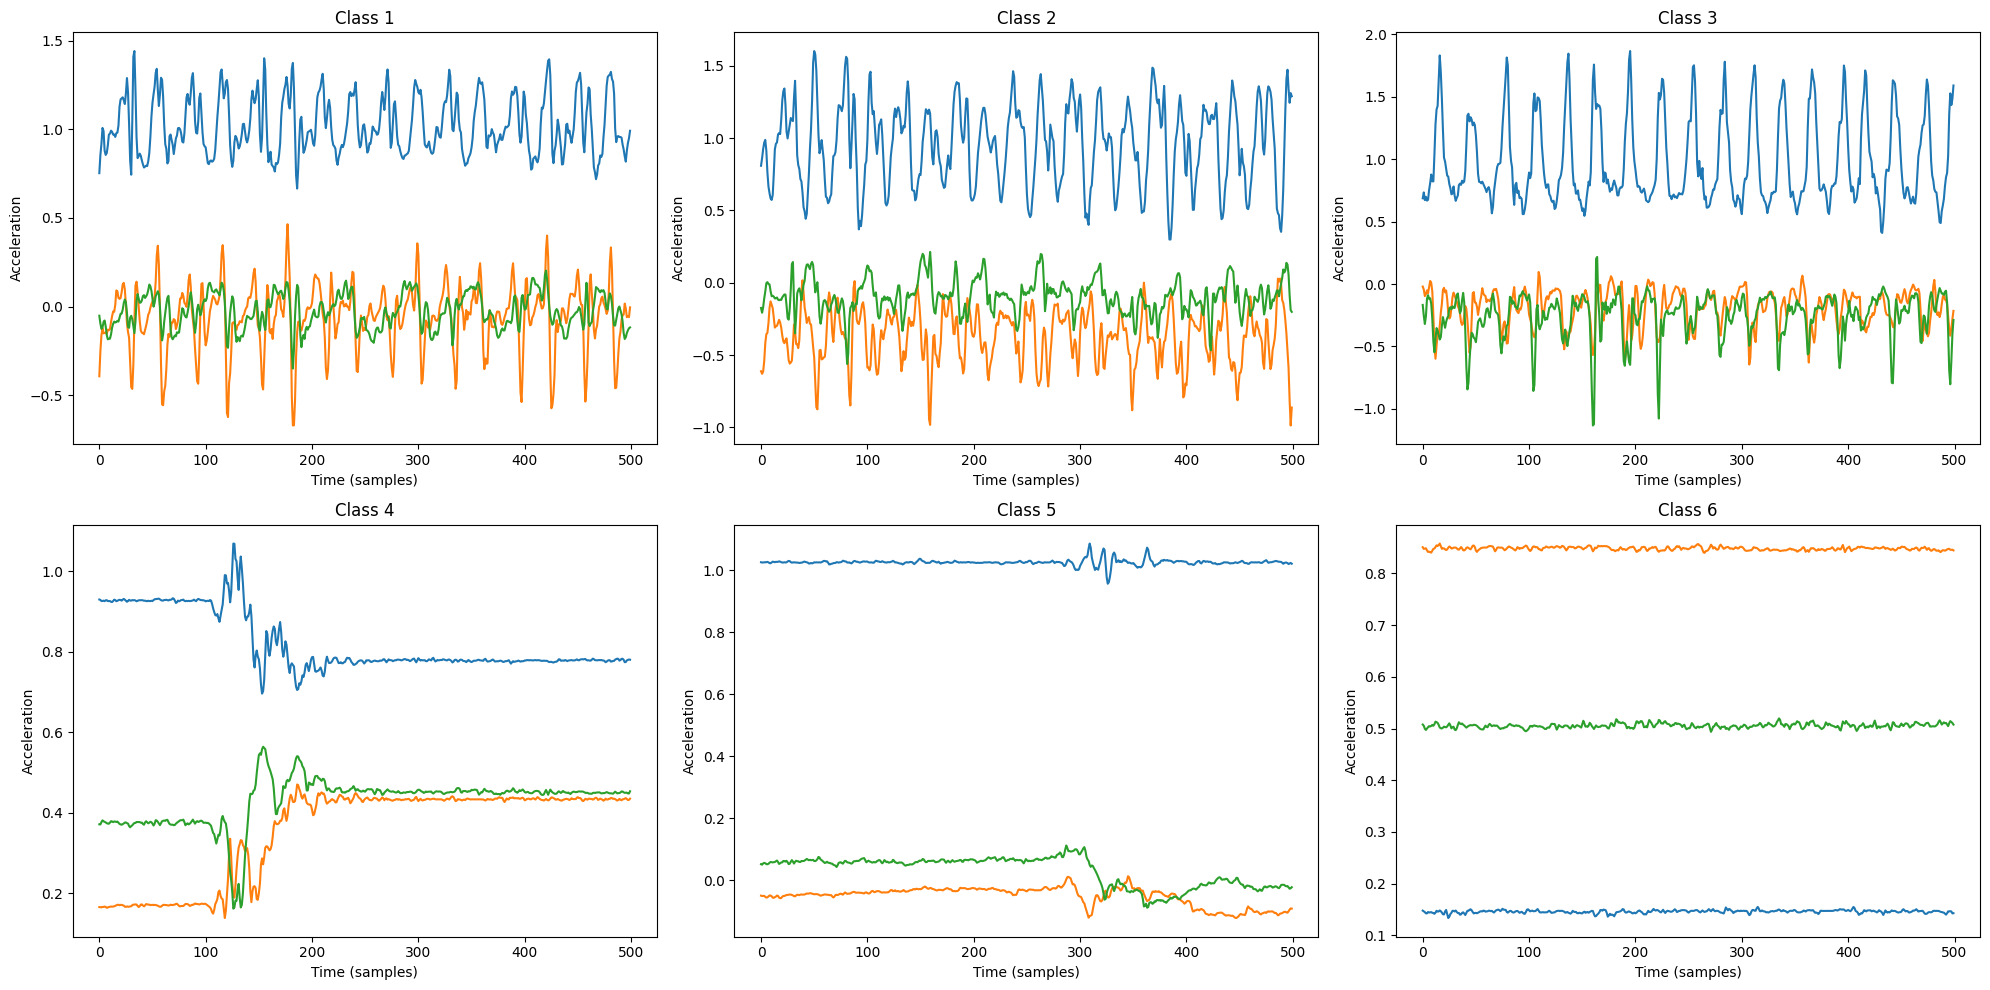

In [697]:
import matplotlib.pyplot as plt

unique_classes = np.unique(y_train)
samples_per_class = {}

for cls in unique_classes:
    index = np.where(y_train == cls)[0][0]
    samples_per_class[cls] = X_train[index]

plt.figure(figsize=(20, 10))

for i, cls in enumerate(unique_classes, 1):
    plt.subplot(2, 3, i)
    plt.plot(samples_per_class[cls])
    plt.title(f"Class {cls}")
    plt.xlabel("Time (samples)")
    plt.ylabel("Acceleration")
plt.tight_layout()
plt.show()


#
#### Class-1,2 and 3 seem similar to each other in the fact that their magnoitudes of acceleration vary rapidly and highly. 
#### Whereas,Class - 4,5 and 6 seem similar to each other as their is comparatively less variation in the accelerations with a single instantaneous spike in  4 and 5 and almost flat response in 6.  


#
#
## 2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities (walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration \( \sqrt{acc_{x}^2 + acc_{y}^2 + acc_{z}^2} \) for each activity and justify your answer.




Class 1 : Mean linear acceleration value = 1.5681926652673772 
Standard deviation = 0.16422804785171016 
Variance = 0.026970851701183605

Class 2 : Mean linear acceleration value = 1.7254691306959091 
Standard deviation = 0.3024821178597835 
Variance = 0.09149543162493998

Class 3 : Mean linear acceleration value = 2.1519161723409765 
Standard deviation = 0.3777873644551967 
Variance = 0.1427232927420036

Class 4 : Mean linear acceleration value = 1.101074972042835 
Standard deviation = 0.01768379578810015 
Variance = 0.0003127166334752286

Class 5 : Mean linear acceleration value = 1.0930071511213189 
Standard deviation = 0.010197547213113877 
Variance = 0.00010398996916368658

Class 6 : Mean linear acceleration value = 1.0087629105983478 
Standard deviation = 0.002970119775603606 
Variance = 8.821611481431615e-06



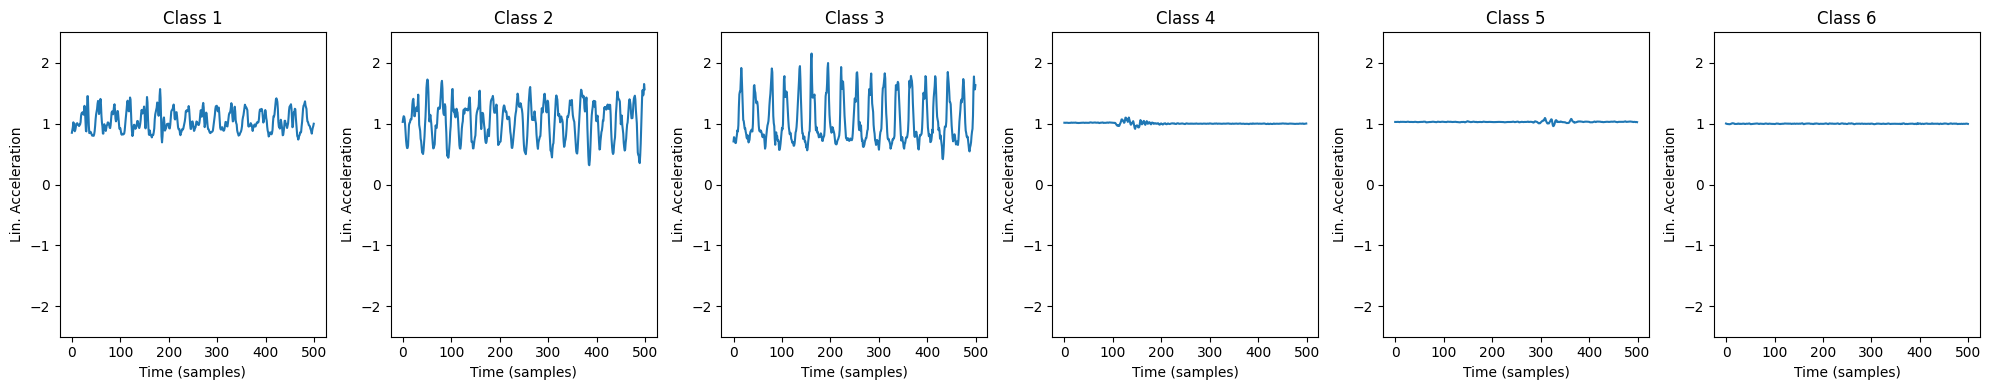

In [636]:
linear_acceleration_train = np.sqrt(np.sum(X_train**2, axis=2))
linear_acceleration_test = np.sqrt(np.sum(X_test**2, axis=2))

plt.figure(figsize=(20, 4))

for i, cls in enumerate(unique_classes, 1):
    plt.subplot(1, 6, i)
    vec = linear_acceleration_train[np.where(y_train == cls)[0][0]]    
    plt.plot(vec)
    plt.title(f"Class {cls}")
    plt.xlabel("Time (samples)")
    plt.ylabel("Lin. Acceleration")
    plt.ylim(-2.5,2.5)
    print(f"Class {cls} : Mean linear acceleration value = {vec.max()} \nStandard deviation = {vec.std()} \nVariance = {vec.var()}\n")


plt.tight_layout()
plt.show()


#
#### We don't as such need a ML model to distinguish between the Static and Dynamic activities. As evident from the graphs, we could directly distinguish between them as they (Static and Dynamic) differ a lot in terms of their max values/standard deviation/Variance(almst in multiple orders of magnitude).

#
#
## 3. **Visualize the data using PCA.** **[1 mark]**

###  - Use PCA (Principal Component Analysis) on Total Acceleration \( \sqrt{acc_{x}^2 + acc_{y}^2 + acc_{z}^2} \) to compress the acceleration timeseries into two features and plot a scatter plot to visualize different classes of activities.


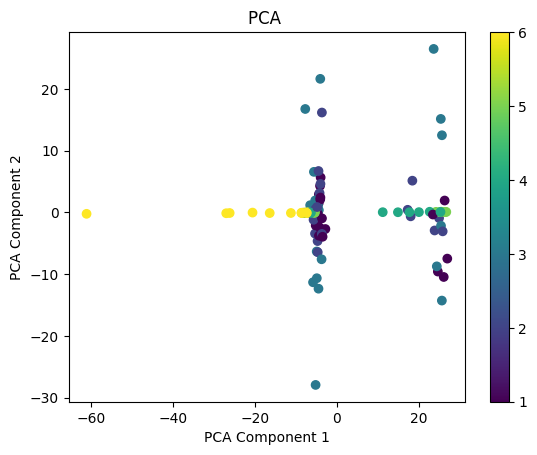

In [637]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(linear_acceleration_train)

pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(X_scaled)
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=y_train) 
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.colorbar()
plt.show()


#
### - Next, use TSFEL (a featurizer library) to create features (your choice of which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different classes of activities.


In [639]:
import tsfel                       # list of features to be extraxtetd using TSFEL library
features = {
    "statistical": {
        "Entropy": {
            "complexity": "log",
            "description": "Computes the entropy of the signal using the Shannon Entropy.",
            "function": "tsfel.entropy",
            "parameters": {
                "prob": "standard"
            },
            "n_features": 1,
            "use": "yes",
            "tag": "eeg"
        },
        "Max": {
            "complexity": "constant",
            "description": "Computes the maximum value of the signal.",
            "function": "tsfel.calc_max",
            "parameters": "",
            "n_features": 1,
            "use": "yes"
        },
        "Mean absolute deviation": {
            "complexity": "log",
            "description": "Computes mean absolute deviation of the signal.",
            "function": "tsfel.mean_abs_deviation",
            "parameters": "",
            "n_features": 1,
            "use": "yes"
        },
        "Median absolute deviation": {
            "complexity": "constant",
            "description": "Computes median absolute deviation of the signal.",
            "function": "tsfel.median_abs_deviation",
            "parameters": "",
            "n_features": 1,
            "use": "yes"
        },
        "Min": {
            "complexity": "constant",
            "description": "Computes the minimum value of the signal.",
            "function": "tsfel.calc_min",
            "parameters": "",
            "n_features": 1,
            "use": "yes"
        },
        "Root mean square": {
            "complexity": "constant",
            "description": "Computes root mean square of the signal.",
            "function": "tsfel.rms",
            "parameters": "",
            "n_features": 1,
            "use": "yes",
            "tag": [
                "emg",
                "inertial"
            ]
        },
        "Standard deviation": {
            "complexity": "constant",
            "description": "Computes standard deviation of the signal.",
            "function": "tsfel.calc_std",
            "parameters": "",
            "n_features": 1,
            "use": "yes"
        },
        "Variance": {
            "complexity": "constant",
            "description": "Computes variance of the signal.",
            "function": "tsfel.calc_var",
            "parameters": "",
            "n_features": 1,
            "use": "yes"
        }
    },
    "temporal": {
        "Zero crossing rate": {
            "complexity": "constant",
            "description": "Computes Zero-crossing rate of the signal.",
            "function": "tsfel.zero_cross",
            "parameters": "",
            "n_features": 1,
            "use": "yes",
            "tag": [
                "audio",
                "emg"
            ]
        }
    }
}


X_train_tsfel = np.zeros((len(linear_acceleration_train),9))
X_test_tsfel = np.zeros((len(linear_acceleration_test),9))

for i in range(len(linear_acceleration_train)):
           
       X_train_tsfel[i]= np.array(tsfel.time_series_features_extractor(features, linear_acceleration_train[i],fs=50))
    
for i in range(len(linear_acceleration_test)):
    
       X_test_tsfel[i]=np.array(tsfel.time_series_features_extractor(features, linear_acceleration_test[i],fs=50))
    
print("X_train_features shape:", X_train_tsfel.shape)
print("X_test_features shape:", X_test_tsfel.shape)


*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
X_train_features shape: (126, 9)
X_test_features shape: (54, 9)


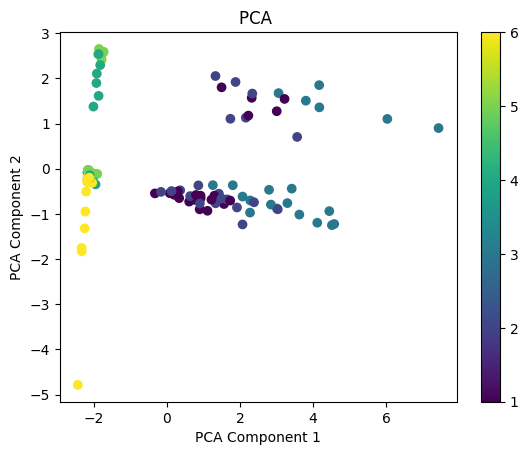

In [640]:
X_scaled = scaler.fit_transform(X_train_tsfel)
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y_train) 
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.colorbar()
plt.show()


#
 ### - Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

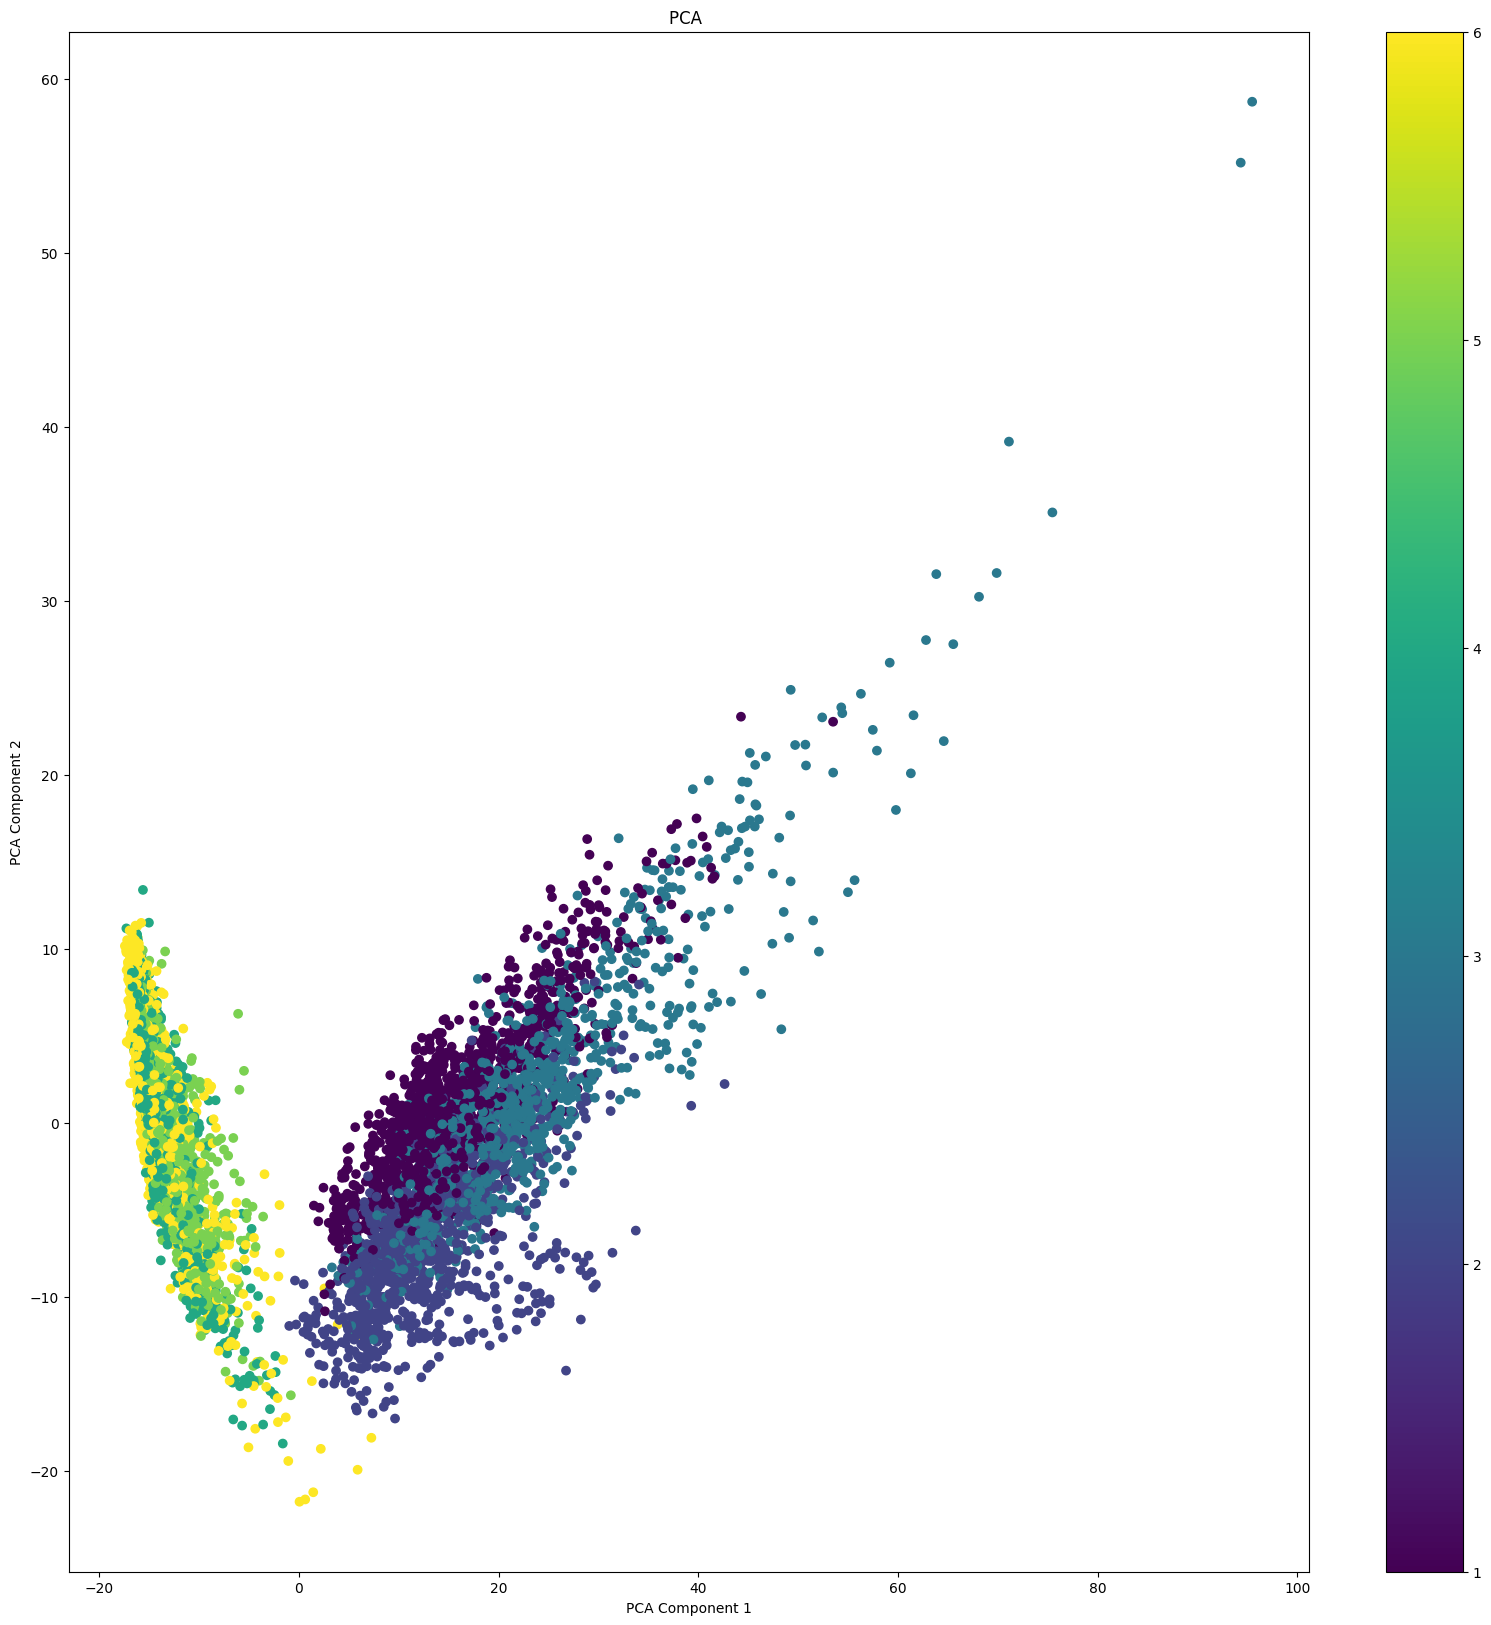

In [641]:
X_scaled = scaler.fit_transform(X_tr_feat)
pca3 = PCA(n_components=2)
X_pca3 = pca3.fit_transform(X_scaled)
plt.figure(figsize=(20, 20))
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=y_tr_feat) 
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.colorbar()
plt.show()


#
### - Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

#### The PCA on TSFEL features method seems to be the best when it comes to visualizing, as it extracts a wide range of features from time series data, including statistical, temporal, and frequency-domain characteristics and provides better seperation between most of the 6 classes as evident from the scatter plot. 
#### PCA on total acceleration just provides a basic overview of the movement patterns but might not capture complex features like frequency components or specific directional accelerations.
#### The originally provided features also provide seperation but are difficult to interpret.
#### It is very difficult to visualize decision boundaries on 561 featurs matrix plot. On the other hand we could realise much easily, the  decision boundaries in the featurised data.

#
#
## 4. Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? 

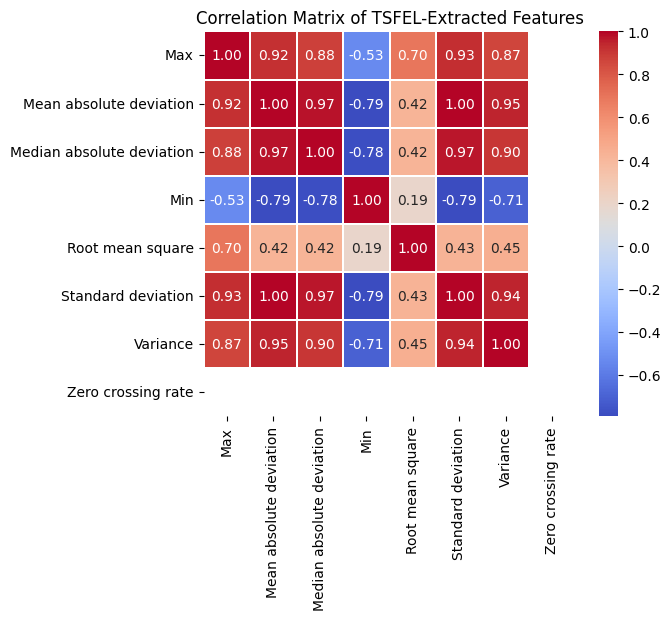

In [642]:
X_scaled = scaler.fit_transform(X_train_tsfel)
feature_names = ["Entropy","Max","Mean absolute deviation","Median absolute deviation","Min","Root mean square","Standard deviation","Variance","Zero crossing rate"]
features_df = pd.DataFrame(X_scaled[:, 1:], columns=feature_names[1:])
correlation_matrix = features_df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.15)
plt.title("Correlation Matrix of TSFEL-Extracted Features")
plt.show()




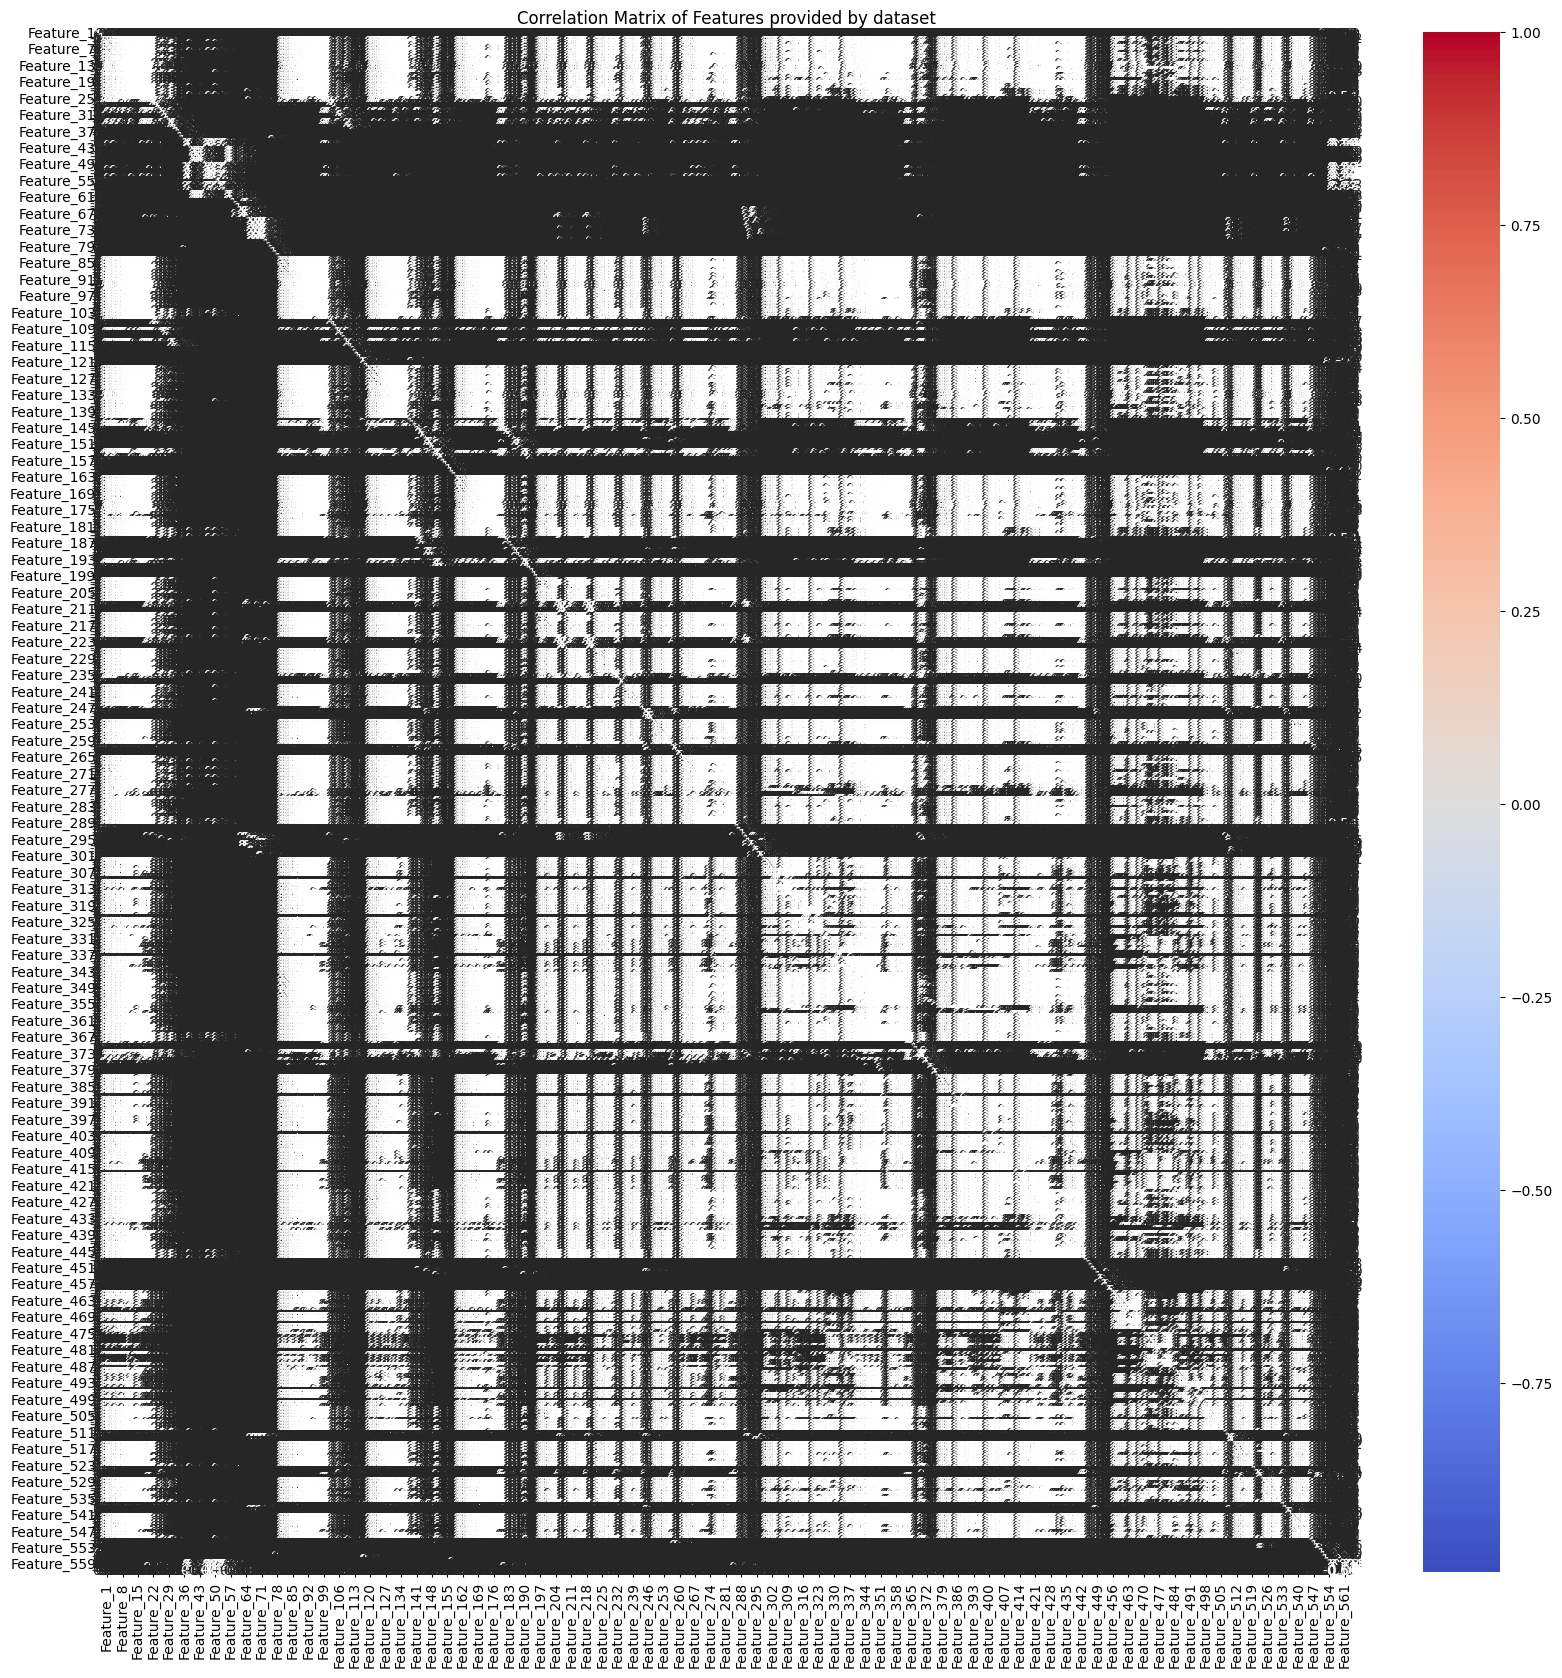

In [643]:
X_scaled = scaler.fit_transform(X_tr_feat)

feature_names = [f'Feature_{i+1}' for i in range(X_scaled.shape[1])]
features_df = pd.DataFrame(X_scaled, columns=feature_names)
correlation_matrix = features_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.15)
plt.title("Correlation Matrix of Features provided by dataset")
plt.show()

#
#### Highly correlated features are often redundant because they convey similar information. Keeping both features in a model might not be beneficial and can lead to overfitting. 
#### There are multiple redundant features in the case of TSFEL featurisation, which is evident from the values of correlation coefficients(values are close to 1). Std Dev and Variance, Std Dev and Mean absolute deviation are some examples which are highly redundant.

*** 

#
#
#
# Task 2 : Decision Trees for Human Activity Recognition [3 marks]

#
## 1. **Use Sklearn Library to train Decision Tress. [1.5 marks]**
 ### - Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

Accuracy: 0.50
Precision: 0.48
Recall: 0.50
F1-score: 0.48


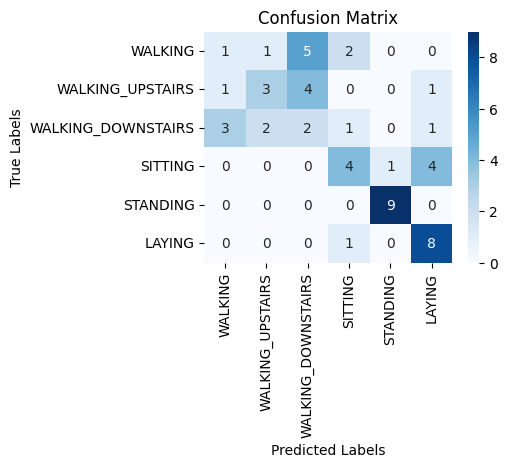

In [644]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

clf = DecisionTreeClassifier()
clf.fit(linear_acceleration_train, y_train)

y_pred = clf.predict(linear_acceleration_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=classes.keys(), yticklabels=classes.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#
 ### - Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

Accuracy: 0.70
Precision: 0.70
Recall: 0.70
F1-score: 0.69


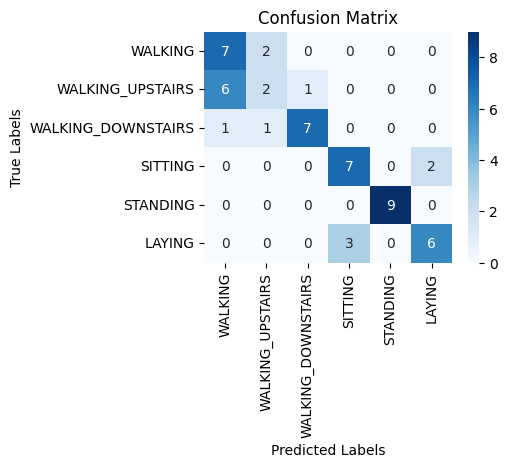

In [661]:
clfn = DecisionTreeClassifier()
clfn.fit(X_train_tsfel, y_train)
y_pred = clfn.predict(X_test_tsfel)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=classes.keys(), yticklabels=classes.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#
### - Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-score: 0.86


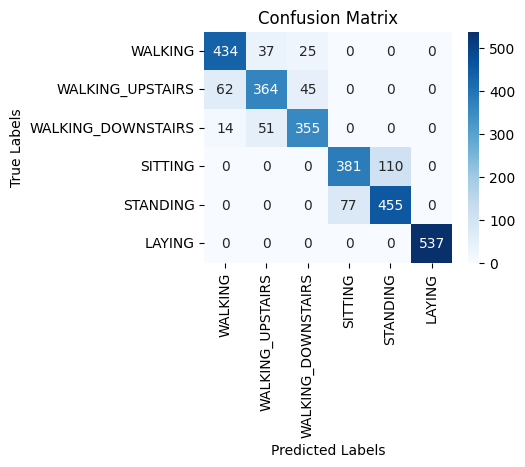

In [646]:
clf = DecisionTreeClassifier()
clf.fit(X_tr_feat, y_tr_feat)

y_pred = clf.predict(X_te_feat)
accuracy = accuracy_score(y_te_feat, y_pred)
precision = precision_score(y_te_feat, y_pred, average='weighted')
recall = recall_score(y_te_feat, y_pred, average='weighted')
f1 = f1_score(y_te_feat, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

conf = confusion_matrix(y_te_feat, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=classes.keys(), yticklabels=classes.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#
### - Compare the results of the three models. Which model do you think is better?

#### The third model that uses features provided by the dataset seems to be the best in terms of accuracy, precision, F1, and recall values.
#### However the thing to keep in mind is that the no. of samples provided to this model is very high as compared to others.
#### The first model lacks behind the most as it uses just the raw data where the model cannot differentiate between the classes (Due to weaker variances between the classes).
#### The second one performs better due to the strong features extracted using TSFEL that provide a way to have more variance between each classes.




#
#
## 2. Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. [1 marks]


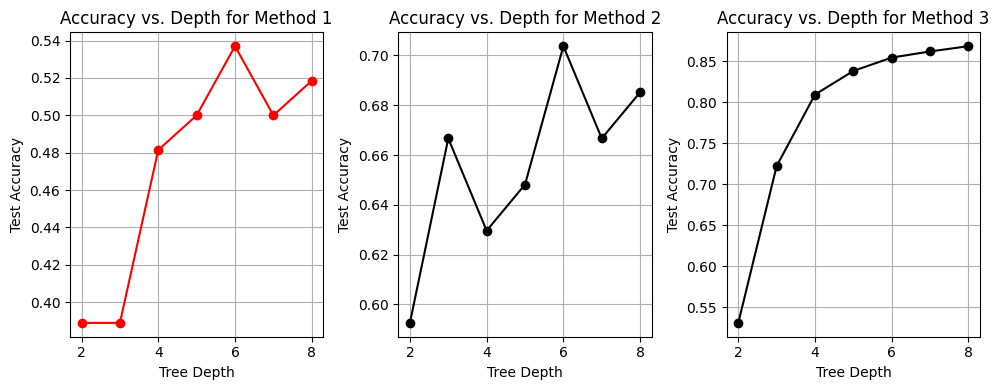

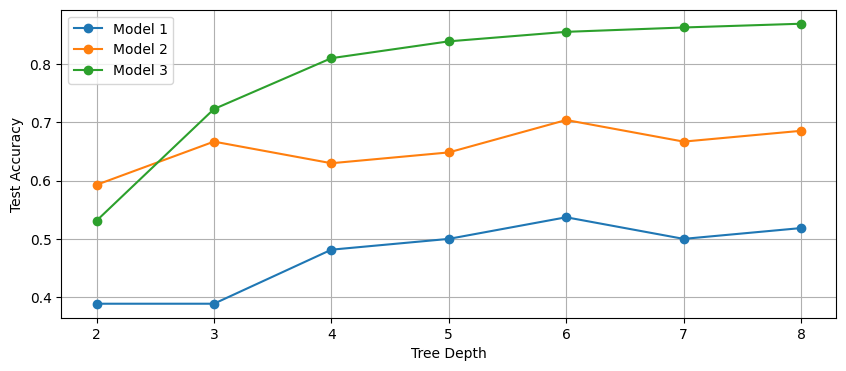

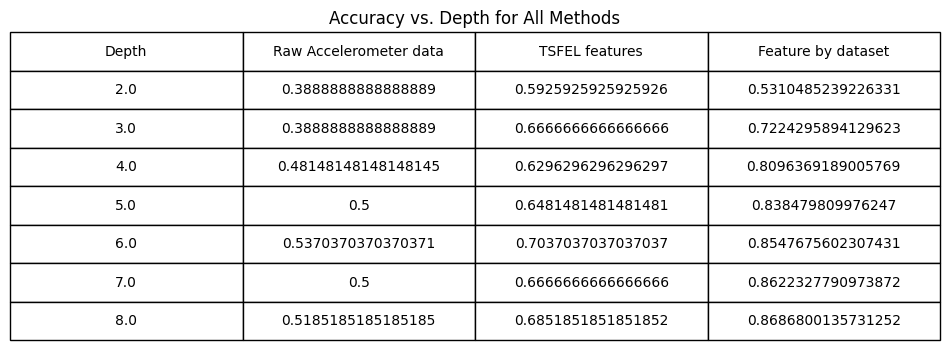

In [647]:
depths = range(2, 9)
acc_1 = []

## Accuracy for varying depths using raw accelerometer data
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(linear_acceleration_train, y_train)    
    y_pred = model.predict(linear_acceleration_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_1.append(accuracy)

plt.figure(figsize=(10, 4))

plt.subplot(1 ,3,1)
plt.plot(depths, acc_1, marker='o',color = 'red')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs. Depth for Method 1')
plt.grid(True)

## Accuracy for varying depths using TSFEL features
acc_2 = []
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train_tsfel, y_train)
    y_pred = model.predict(X_test_tsfel)
    accuracy = accuracy_score(y_test, y_pred)
    acc_2.append(accuracy)
plt.subplot(1 ,3,2)
plt.plot(depths, acc_2, marker='o',color = 'black')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs. Depth for Method 2')
plt.grid(True)


## Accuracy for varying depths using features provided by the dataset
acc_3 = []
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_tr_feat, y_tr_feat)
    y_pred = model.predict(X_te_feat)
    accuracy = accuracy_score(y_te_feat, y_pred)
    acc_3.append(accuracy)
plt.subplot(1 ,3,3)
plt.plot(depths, acc_3, marker='o',color = 'black')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs. Depth for Method 3')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(depths, acc_1, marker='o', label='Model 1')
plt.plot(depths, acc_2, marker='o', label='Model 2')
plt.plot(depths, acc_3, marker='o', label='Model 3')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid()
plt.show()

import pandas as pd
accuracy_data = {
    'Depth': depths,
    'Raw Accelerometer data': acc_1,
    'TSFEL features': acc_2,
    'Feature by dataset': acc_3
}
df_accuracy = pd.DataFrame(accuracy_data)
plt.figure(figsize=(12, 4))
plt.axis('off')  # Hide the axis
table = plt.table(cellText=df_accuracy.values,
                  colLabels=df_accuracy.columns,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
plt.title('Accuracy vs. Depth for All Methods')
plt.show()




#
#
## 3. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? 

#### The models in general struggle to distinguish between walking up, walking down, walking(dynamic) as all these are almost similar kind of activities. It also struggles(somewhat) to correctly distinguish between the other 3 classes (static) however the tendency to go wrong on static activities is much lower as compared to dynamic activities.
#### It is important to notice that most of the errors are among the dynamic activities itself i.e. the model is not able to distinguish between dynamic activities. So the model performance is bad when it comes to distinguish or predict upon the dynamic activies.

The reason for bad performance can be that the magnitudes of acceleration are almost same or in the same range and all of them have major fluctuations which are also more or less same. Since all the activities are similar i.e. of walking and having such similar dataset it could be difficult for our models to accurately predict them with 100% accuracy. Still the featurized dataset that we created is able to do comparatively good.


***

#
#
#
#
# Task 3 : Prompt Engineering for Large Language Models (LLMs) [4 marks]

In [648]:

from langchain_groq.chat_models import ChatGroq


In [649]:
Groq_token = "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"
groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}


#

## 1. Demonstrate how to use Zero-Shot Learning and Few-Shot Learning to classify human activities based on the featurized accelerometer data. Qualitatively demonstrate the performance of Few-Shot Learning with Zero-Shot Learning. Which method performs better? Why?

In [650]:
import random
num = random.randint(0,len(X_train_tsfel))
random_indices = random.sample(range(len(X_train_tsfel)), 5)
Data_test = []
for id in random_indices:
    Data_test.append(X_train_tsfel[id])

# System Prompts 
query = f"""
* You are a Human activity recognition model. 
* Your task is to classify the provided accelerometer data(a feature vector of 9 features extracted from accleration data) into the following set of activities: ["LAYING":6,"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5]. 
* Provide the activity class prediction and, if necessary, a brief explanation of your reasoning.

Data1: {Data_test[0]}
Data2: {Data_test[1]}
Data3: {Data_test[2]}
Data4: {Data_test[3]}
Data5: {Data_test[4]}
""" 

model_name = "llama3-70b" 
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_token, temperature=0)
answer = llm.invoke(query)

print(answer.content)
print("-"*100)

print(f"\n\nThe actual classes were {y_train[random_indices]}")
print("-"*100)



Data = []
y_Data = []
for cls in unique_classes:
    index = np.where(y_train == cls)[0][0]
    Data.append(X_train_tsfel[index])
    y_Data.append(y_train[index])  
    
# System Prompts 
query = f"""
* You are a Human activity recognition model. 
* Your task is to classify the provided accelerometer data(a feature vector of 9 features extracted from accleration data) into the following set of activities: ["LAYING":6,"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5]. 
* Provide the activity class prediction and, if necessary, a brief explanation of your reasoning.

Here are few examples of data and their corresponding classes:
1. Example_Data1: {Data[0]}'
Class: {y_Data[0]}

2.Example_Data2: {Data[1]}'
Class: {y_Data[1]}

3. Example_Data3: {Data[2]}'
Class: {y_Data[2]}

4. Example_Data4: {Data[3]}'
Class: {y_Data[3]}

5. Example_Data5: {Data[4]}'
Class: {y_Data[4]}

6. Example_Data6: {Data[5]}'
Class: {y_Data[5]}

The data to be predicted is : Data1: {Data_test[0]}
Data2: {Data_test[1]}
Data3: {Data_test[2]}
Data4: {Data_test[3]}
Data5: {Data_test[4]}
""" 

# To use Groq LLMs 
model_name = "llama3-70b" 
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_token, temperature=0)
answer = llm.invoke(query)


print(f"{answer.content}\n\n")
print("-"*100)

print(f"\n\nThe actual classes were {y_train[random_indices]}")


I'll do my best to classify each data point into one of the six activities.

**Data1:** [1.00000000e+00 1.04121234e+00 3.94954276e-03 2.69396955e-03 9.87631182e-01 1.01011264e+00 5.81055442e-03 3.37625427e-05 0.00000000e+00]

Prediction: LAYING (6)

Reasoning: The features of this data point suggest a relatively low level of movement and acceleration, with small values in the third to eighth features. This is consistent with a person lying down, where there is minimal movement and acceleration.

**Data2:** [1.         2.47004988 0.30468652 0.22733081 0.84524211 1.484273 0.36711696 0.13477486 0.        ]

Prediction: WALKING (1)

Reasoning: The features of this data point suggest a moderate level of movement and acceleration, with larger values in the second to fifth features. This is consistent with a person walking, where there is a regular pattern of movement and acceleration.

**Data3:** [1.00000000e+00 1.10107497e+00 1.07533261e-02 3.37645410e-03 9.13978216e-01 1.00431465e+00 1.768

#
#### The few shot learning method performs slightly better, predicting 2/6 correctly, while The zero-shot method predicts 1/6 correctly. The zero shot learning model is not really accurate as it only relies on whatever it knows about the provided classes. Th few-shot model, however has an idea of how the features vary in each activity class, also they know about the general range of values for each feature corresponding to a class.

#
#
## 2. Quantitatively compare the accuracy of Few-Shot Learning with Decision Trees (You may use a subset of the test set if you encounter rate-limiting issues). Which method performs better? Why?

In [678]:
num = random.randint(0,len(X_test_tsfel))
random_indices = random.sample(range(len(X_test_tsfel)), 20)
Data_test = []
new_label = []
for id in random_indices:
    Data_test.append(X_test_tsfel[id])
    new_label.append(y_test[id])
    



Data = []
y_Data = []
for cls in unique_classes:
    index = np.where(y_train == cls)[0][0]
    Data.append(X_train_tsfel[index])
    y_Data.append(y_train[index])  
    


y_pred_DT = []
y_pred_FSL = []
clfn = DecisionTreeClassifier()
clfn.fit(X_train_tsfel, y_train)
for i in range(20): 
        print(f"\n\nFew Shot Round : {i}\n\n")

        query = f"""
        * You are a Human activity recognition model. 
        * Your task is to classify the provided accelerometer data(a feature vector of 9 features extracted from accleration data) into the following set of activities: ["LAYING":6,"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5]. 
        * Provide the activity class prediction.
        
        Here are few examples of data and their corresponding classes:
        1. Example_Data1: {Data[0]}'
        Class: {y_Data[0]}
        
        2.Example_Data2: {Data[1]}'
        Class: {y_Data[1]}
        
        3. Example_Data3: {Data[2]}'
        Class: {y_Data[2]}
        
        4. Example_Data4: {Data[3]}'
        Class: {y_Data[3]}
        
        5. Example_Data5: {Data[4]}'
        Class: {y_Data[4]}
        
        6. Example_Data6: {Data[5]}'
        Class: {y_Data[5]}
        
        The data to be predicted is : Data1: {Data_test[i]}
        give your predicted class no. on a seperate line
        """ 
    
        model_name = "llama3-70b" 
        llm = ChatGroq(model=groq_models[model_name], api_key=Groq_token, temperature=0)
        answer = llm.invoke(query)
        print(f"{answer.content}\n\n")
        fsl_prediction = int(answer.content.strip()[-1])
        y_pred_FSL.append(fsl_prediction)
        
        print("-"*100)
        pre_DT = clfn.predict(Data_test[i].reshape(1, -1))
        y_pred_DT.append(pre_DT)
        print(f"The class predicted by decision tree = {pre_DT}")
        print("-"*100)
        print(f"\n\nThe actual class was {new_label[i]}")
        print("-"*100)





Few Shot Round : 0


2


----------------------------------------------------------------------------------------------------
The class predicted by decision tree = [1]
----------------------------------------------------------------------------------------------------


The actual class was 2
----------------------------------------------------------------------------------------------------


Few Shot Round : 1


6


----------------------------------------------------------------------------------------------------
The class predicted by decision tree = [5]
----------------------------------------------------------------------------------------------------


The actual class was 5
----------------------------------------------------------------------------------------------------


Few Shot Round : 2


2


----------------------------------------------------------------------------------------------------
The class predicted by decision tree = [1]
---------------------------------

In [701]:
y_true = np.array(new_label)
y_pred_FSL = np.array(y_pred_FSL)
y_pred_DT = np.array(y_pred_DT)


accuracy1 = accuracy_score(y_true, y_pred_FSL)
accuracy2 = accuracy_score(y_true, y_pred_DT)

precision1 = precision_score(y_true, y_pred_FSL, average='weighted', zero_division = 0)
precision2 = precision_score(y_true, y_pred_DT, average='weighted', zero_division = 0)

recall1 = recall_score(y_true, y_pred_FSL, average='weighted')
recall2 = recall_score(y_true, y_pred_DT, average='weighted')

f11 = f1_score(y_true, y_pred_FSL, average='weighted')
f12 = f1_score(y_true, y_pred_DT, average='weighted')

print(f"\n\n\nAccuracy:   \nFew Shot learning:   {accuracy1:.2f}     Decision Tree:   {accuracy2:.2f} ")
print(f"Precision:  \nFew Shot learning:   {precision1:.2f}     Decision Tree:   {precision2:.2f}")
print(f"Recall:     \nFew Shot learning:   {recall1:.2f}     Decision Tree:   {recall2:.2f}")
print(f"F1-score:   \nFew Shot learning:   {f11:.2f}     Decision Tree:   {f12:.2f}")

print("\nConfusion Matrix:")
print("Few-Shot Learning:")
print(confusion_matrix(y_true, y_pred_FSL))
print("\nDecision Tree:")
print(confusion_matrix(y_true, y_pred_DT))





Accuracy:   
Few Shot learning:   0.55     Decision Tree:   0.65 
Precision:  
Few Shot learning:   0.48     Decision Tree:   0.62
Recall:     
Few Shot learning:   0.55     Decision Tree:   0.65
F1-score:   
Few Shot learning:   0.50     Decision Tree:   0.62

Confusion Matrix:
Few-Shot Learning:
[[2 2 0 0 0 0]
 [0 2 2 0 0 0]
 [0 1 5 0 0 0]
 [0 0 0 0 1 1]
 [1 0 0 0 0 1]
 [0 0 0 0 0 2]]

Decision Tree:
[[3 1 0 0 0 0]
 [3 0 1 0 0 0]
 [0 1 5 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 1 0 1]]


#### FSL method might perform well on data that is similar to the examples but can struggle with instances that differ significantly from the provided examples. Whereas, 
#### Decision tree model has been trained on the entire dataset and uses a series of rules to make predictions. So it's generally predictable that it performs consistently across different types of data but might not capture complex patterns as well as more sophisticated models. 

#
#

## 3. What are the limitations of Zero-Shot Learning and Few-Shot Learning in the context of classifying human activities based on featurized accelerometer data?

Zero-Shot Learning assumes that model can generalize to entirely new class based on the available information and their semantic descriptions. However, as the new activity data tends to significantly differ from the known activities in terms of sensor data patterns, the model struggles to generalize effectively.
In, Few-Shot Learning if the support set does not adequately capture the variability of the activity, the model fails to generalize well to new instances of the activity. There is a risk of overfitting to the support set, especially if the examples are not diverse. This can result in poor performance on new, unseen data, as the model may memorize the few examples rather than generalize from them.
Also, the number of classes might be a factor too, as higher number of classes to predict, demands higher variabitlity between classes to be able to distinguish and also the support set must be able to convey these variations.


#
#
## 4. What does the model classify when given input from an entirely new activity that it hasn't seen before?



In [702]:
query = f"""
        * You are a Human activity recognition model. 
        * Your task is to classify the provided accelerometer data(a feature vector of 9 features extracted from accleration data) into the following set of activities: ["LAYING":6,"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5]. 
        * Provide the activity class prediction and, if necessary, a brief explanation of your reasoning.
        
        Here are few examples of data and their corresponding classes:
        1. Example_Data1: {Data[0]}'
        Class: {y_Data[0]}
        
        2.Example_Data2: {Data[1]}'
        Class: {y_Data[1]}
        
        3. Example_Data3: {Data[2]}'
        Class: {y_Data[2]}
        
        4. Example_Data4: {Data[3]}'
        Class: {y_Data[3]}
        
        5. Example_Data5: {Data[4]}'
        Class: {y_Data[4]}
        
        The data to be predicted is : Data1: {Data[5]}
        """ 
    
model_name = "llama3-70b" 
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_token, temperature=0)
answer = llm.invoke(query)
print(f"{answer.content}\n\n")


Based on the provided feature vector, I predict the activity class as **5: STANDING**.

Here's a brief explanation of my reasoning:

* The feature vector has a relatively low standard deviation (feature 2) and a low mean absolute difference (feature 3), indicating a stable and consistent acceleration pattern, which is characteristic of standing or sitting activities.
* The mean acceleration (feature 1) is close to 1, which suggests that the device is relatively still, further supporting the standing or sitting hypothesis.
* The correlation between the acceleration signals (features 4-6) is high, which is consistent with the stable and consistent pattern observed in standing or sitting activities.
* The energy bands (features 7-9) have relatively low values, which suggests that the activity is not intense or dynamic, such as walking or running.

Comparing the feature vector with the provided examples, I notice that it is most similar to Example_Data5, which is classified as **5: STANDIN

#### Answer : In terms of zero shot learning every activity is a new activity for it, and it produces the output by matching sementics with other activities that it already would have been trained on.
#### For Few shot learning, new activity would be to train it on 5 out of the 6 classes and test it on the 6th unknown class. here it will (similar to Zero shot learning) try to match sementics with the known 5 classes and predict the maximum overlapping class.

#
#
## 5. Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results.
We create a random sample of same dimensions and ranges and then Use few shot learning model to predict the activity.

In [712]:
min_values = np.min(X_train_tsfel, axis=0)
max_values = np.max(X_train_tsfel, axis=0)
random_samples = np.random.uniform(low=min_values, high=max_values, size=(5, 9))



for i in range(len(random_samples)):
        query = f"""
                * You are a Human activity recognition model. 
                * Your task is to classify the provided accelerometer data(a feature vector of 9 features extracted from accleration data) into the following set of activities: ["LAYING":6,"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5]. 
                * Provide the activity class prediction and, if necessary, a brief explanation of your reasoning.
                
                Here are few examples of data and their corresponding classes:
                1. Example_Data1: {Data[0]}'
                Class: {y_Data[0]}
                
                2.Example_Data2: {Data[1]}'
                Class: {y_Data[1]}
                
                3. Example_Data3: {Data[2]}'
                Class: {y_Data[2]}
                
                4. Example_Data4: {Data[3]}'
                Class: {y_Data[3]}
                
                5. Example_Data5: {Data[4]}'
                Class: {y_Data[4]}
                
                The data to be predicted is : Data1: {random_samples[i]}
                """ 
            
        model_name = "llama3-70b" 
        llm = ChatGroq(model=groq_models[model_name], api_key=Groq_token, temperature=0)
        answer = llm.invoke(query)
        print(f"\n\n{answer.content}\n\n")
        print("--"*60)




A new data point to classify!

After analyzing the provided feature vector, I'm going to predict the activity class as:

**WALKING_UPSTAIRS (Class: 2)**

Here's a brief explanation of my reasoning:

* The first feature value (1.0) indicates a relatively high acceleration magnitude, which is consistent with walking-related activities.
* The second feature value (1.09976144) suggests a moderate to high acceleration in the vertical direction, which is typical of walking upstairs.
* The third feature value (0.07122246) indicates a relatively low acceleration in the horizontal direction, which is consistent with walking upstairs.
* The fourth feature value (0.17194381) suggests a moderate acceleration in the mediolateral direction, which is also consistent with walking upstairs.
* The remaining feature values also support this classification, with a relatively high acceleration magnitude and moderate to high acceleration in the vertical direction.

While the feature values are not an exac

#### The model was tested on random data generated within the same dimensions and feature ranges as the original input data. Typically, when a model encounters random data the performance tends to be poor. This is expected because the random data doesn't follow the patterns or distributions the classes that the model has learned during training.
#### The model then tries to forcefully predict one of the classes by finding relations with the provided training classes.


***

#
#
#
#
# Task 4 : Data Collection in the Wild

6 samples per class were recorded using Physics Toolbox Suite(100 Hz) and stored in .csv format
Below code loads the recorded data, downsamples it to 50Hz, trims out 10s of signal and converts them into a dataset.  

In [683]:
time = 10  
offset = 500 
downsample_fac = 2  
classes = {"WALKING_WILD": 1, "WALKING_UP_WILD": 2, "WALKING_DOWN_WILD": 3, 
           "SITTING_WILD": 4, "STANDING_WILD": 5, "LAYING_WILD": 6}

recorded_data_path = "/Users/pranavs/Downloads/WILD_DATA"

X_test_custom = []
y_test_custom = []

for class_name, class_label in classes.items():
    class_folder = os.path.join(recorded_data_path, class_name)
    files = os.listdir(class_folder)
    
    for file in files:
        file_path = os.path.join(class_folder, file)
        df = pd.read_csv(file_path)
        
        #the data was 100Hz so we downsample it
        df = df.iloc[::downsample_fac, :].reset_index(drop=True)
        df = df[['gFx', 'gFy', 'gFz']]
        df = df[offset:offset + time * 50]
        X_test_custom.append(df.values)
        y_test_custom.append(class_label)
        
X_test_custom = np.array(X_test_custom)
y_test_custom = np.array(y_test_custom)

print("Custom test data shape:", X_test_custom.shape)


Custom test data shape: (36, 500, 3)


In [685]:
tot_acc_custom = np.sqrt(np.sum(X_test_custom**2, axis=2))


#
##  1. Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform? [1 marks]




In [686]:
X_custom_tsfel = np.zeros((len(tot_acc_custom),9))

for i in range(len(tot_acc_custom)):     
       X_custom_tsfel[i]= np.array(tsfel.time_series_features_extractor(features, tot_acc_custom[i],fs=50))
    
print("X_train_features shape:", X_custom_tsfel.shape)


*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
X_train_features shape: (36, 9)


Accuracy: 0.17
Precision: 0.09
Recall: 0.17
F1-score: 0.11


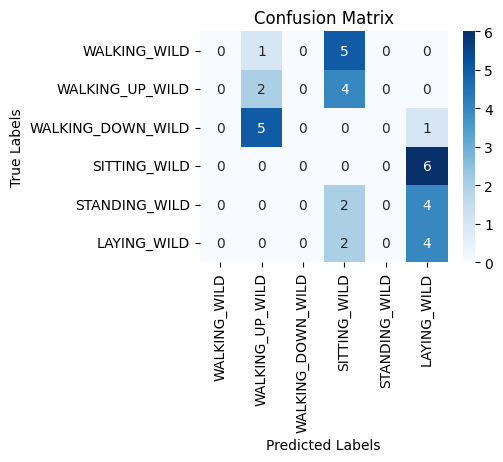

In [694]:
clf = DecisionTreeClassifier()
clf.fit(X_train_tsfel, y_train)

y_pred = clf.predict(X_custom_tsfel)
accuracy = accuracy_score(y_test_custom, y_pred)
precision = precision_score(y_test_custom, y_pred, average='weighted', zero_division = 0)
recall = recall_score(y_test_custom, y_pred, average='weighted')
f1 = f1_score(y_test_custom, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
conf = confusion_matrix(y_test_custom, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=classes.keys(), yticklabels=classes.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Answer : We used the TSFEL feature extraction method for the task.

#### The model performs poorly, as somehow it is unable to generalise the learnings from UCI-HAR dataset and apply it to the collected data. It is somewhat able to differentiate between static and dynamic activities. Laying class is the most accurately predicted class.

#
#
## 2. Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? 



Accuracy: 0.50
Precision: 0.81
Recall: 0.50
F1-score: 0.57


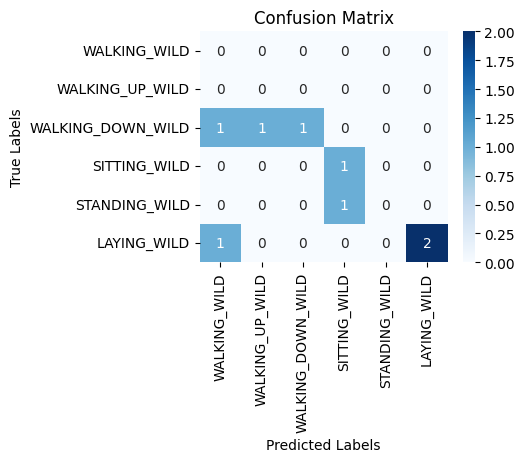

In [695]:
X_tr,X_te,y_tr,y_te = train_test_split(X_custom_tsfel,y_test_custom,test_size=0.2,random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_te)
accuracy = accuracy_score(y_te, y_pred)
precision = precision_score(y_te, y_pred, average='weighted', zero_division = 0)
recall = recall_score(y_te, y_pred, average='weighted', zero_division = 0)
f1 = f1_score(y_te, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

conf = confusion_matrix(y_te, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=classes.keys(), yticklabels=classes.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Answer:  We featurised the data using TSFEL features similar to Task 1 and 2 , used 80 % of data for training and 20% for testing.

#### The model predicts for the laying class almost with 100% accuracy as the signal for the class is easily distinguishable from the other classes. Again, the model can certainly distinguish between an activity being either Static or Dynamic, All the dynamic activities, even if falsely predicted , belonged to dynamic activities, similar for the static activities.

#
#
## 3. Use the Few-Shot prompting method using UCI-HAR dataset to predict the activities that you performed. Ensure that both your examples and test query undergo similar preprocessing. How did the model perform?


In [696]:
Data = []
y_Data = []
for cls in unique_classes:
    index = np.where(y_train == cls)[0][0]
    Data.append(X_train_tsfel[index])
    y_Data.append(y_train[index])  
    
# System Prompts 
query = f"""
* You are a Human activity recognition model. 
* Your task is to classify the provided accelerometer data(a feature vector of 9 features extracted from accleration data ; ["Entropy","Max","Mean absolute deviation","Median absolute deviation","Min","Root mean square","Standard deviation","Variance","temporal"]) into the following set of activities: ["LAYING":6,"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5]. 
* Provide the activity class prediction and, if necessary, a brief explanation of your reasoning.

Here are few examples of data and their corresponding classes:
1. Example_Data1: {Data[0]}'
Class: {y_Data[0]}

2.Example_Data2: {Data[1]}'
Class: {y_Data[1]}

3. Example_Data3: {Data[2]}'
Class: {y_Data[2]}

4. Example_Data4: {Data[3]}'
Class: {y_Data[3]}

5. Example_Data5: {Data[4]}'
Class: {y_Data[4]}

6. Example_Data6: {Data[5]}'
Class: {y_Data[5]}

The data to be predicted is : Data1 : {X_custom_tsfel[0]}
Data2 : {X_custom_tsfel[5]}
Data3 : {X_custom_tsfel[9]}
Data4 : {X_custom_tsfel[14]}
Data5 : {X_custom_tsfel[25]}
Data6 : {X_custom_tsfel[31]}
""" 

# To use Groq LLMs 
model_name = "llama3-70b" 
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

print(f"\n\nThe actual classes were : {y_test_custom[0]}, {y_test_custom[5]}, {y_test_custom[9]}, {y_test_custom[14]}, {y_test_custom[25]}, {y_test_custom[31]}")

I'll provide the activity class predictions for each of the given data points.

**Data1:** [0.99955386 1.23929051 0.02370643 0.00796634 0.81825508 0.99637512 0.05196131 0.00269998 0.        ]
**Predicted Class:** 4 (SITTING)

Reasoning: The features of Data1 are similar to Example_Data4, which is classified as SITTING. The mean absolute deviation, median absolute deviation, and standard deviation are relatively low, indicating a low level of movement, which is consistent with sitting.

**Data2:** [1.00000000e+00 1.05013942e+00 8.27234590e-03 5.92580865e-03 9.70445537e-01 9.96454825e-01 1.21806785e-02 1.48368929e-04 0.00000000e+00]
**Predicted Class:** 5 (STANDING)

Reasoning: The features of Data2 are similar to Example_Data5, which is classified as STANDING. The mean, max, and root mean square values are relatively high, indicating a moderate level of movement, which is consistent with standing.

**Data3:** [1.         1.54562018 0.1948735  0.16346907 0.56749137 1.05104943 0.24607493 

#### Answer : We used the TSFEL featurized formats of data. We trained the model using sample feature vectors (one for each category) and used it to predict the collected data samples(featurised using similar TSFEL features)
#### The Few-Shot prompting method performed quite good, predicting 3/6 samples correctly.

#
#
## 4. Use the Few-Shot prompting method using the data you collected to predict the activities that you performed. Adopt proper processing methods as needed. How did the model perform? [1 marks]


In [710]:
Data = []
y_Data = []
for cls in unique_classes:
    index = np.where(y_tr == cls)[0][0]
    Data.append(X_tr[index])
    y_Data.append(y_tr[index])  
    
# System Prompts 
query = f"""
* You are a Human activity recognition model. 
* Your task is to classify the provided accelerometer data(a feature vector of 9 features extracted from accleration data : ["Entropy","Max","Mean absolute deviation","Median absolute deviation","Min","Root mean square","Standard deviation","Variance","temporal"] ) into the following set of activities: ["LAYING":6,"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5]. 
* Provide the activity class prediction and, if necessary, a brief explanation of your reasoning.

Here are few examples of data and their corresponding classes:
1. Example_Data1: {Data[0]}'
Class: {y_Data[0]}

2.Example_Data2: {Data[1]}'
Class: {y_Data[1]}

3. Example_Data3: {Data[2]}'
Class: {y_Data[2]}

4. Example_Data4: {Data[3]}'
Class: {y_Data[3]}

5. Example_Data5: {Data[4]}'
Class: {y_Data[4]}

6. Example_Data6: {Data[5]}'
Class: {y_Data[5]}

The data to be predicted is : Data1 : {X_custom_tsfel[0]}
Data2 : {X_custom_tsfel[5]}
Data3 : {X_custom_tsfel[9]}
Data4 : {X_custom_tsfel[14]}
Data5 : {X_custom_tsfel[25]}
Data6 : {X_custom_tsfel[31]}
""" 

# To use Groq LLMs 
model_name = "llama3-70b" 
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_token, temperature=0)
answer = llm.invoke(query)
print("--" * 60)
print("\n\n")
print(answer.content)
print("--" * 60)

print(f"\n\nThe actual classes were : {y_test_custom[0]}, {y_test_custom[5]}, {y_test_custom[9]}, {y_test_custom[14]}, {y_test_custom[25]}, {y_test_custom[31]}")
print("--" * 60)

------------------------------------------------------------------------------------------------------------------------



I'll do my best to classify the provided accelerometer data into the corresponding activity classes.

**Data1:** [0.99955386 1.23929051 0.02370643 0.00796634 0.81825508 0.99637512 0.05196131 0.00269998 0.]
**Predicted Class:** 1 (WALKING)

Reasoning: The feature values are similar to Example_Data1, which is also classified as WALKING. The high values of Max, Mean absolute deviation, and Root mean square suggest a high level of movement, consistent with walking.

**Data2:** [1.00000000e+00 1.05013942e+00 8.27234590e-03 5.92580865e-03 9.70445537e-01 9.96454825e-01 1.21806785e-02 1.48368929e-04 0.00000000e+00]
**Predicted Class:** 5 (STANDING)

Reasoning: The feature values are similar to Example_Data5, which is classified as STANDING. The low values of Mean absolute deviation, Median absolute deviation, and Standard deviation suggest a relatively stable posture, con

#### Collected data has been processed for TSFEL featurisation, and trained on one sample from each activity, then used to predict six other samples.
#### The Few-Shot prompting method performed good, predicting 3/6 samples correctly. The model essentially seems to be able to distinguish between static and dynamic activities. It struggles in distinguishing between activities in a single category. 